In [ ]:
import pandas as pd
import re
from re import sub
import matplotlib.pyplot as plt
import os
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp1 = dataset = pd.read_csv("/content/drive/MyDrive/ANDAJE/newspaper_main.csv")

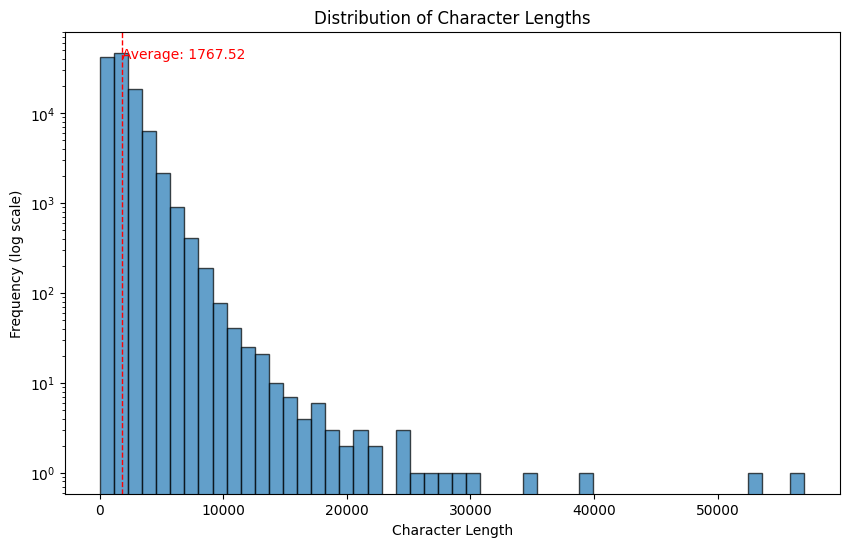

In [ ]:





dataset['Char_Length'] = dataset['Text'].apply(len)


plt.figure(figsize=(10, 6))
plt.hist(dataset['Char_Length'], bins=50, edgecolor='k', alpha=0.7) 
plt.yscale('log')  

average_char_length = dataset['Char_Length'].mean()
plt.axvline(average_char_length, color='r', linestyle='dashed', linewidth=1)
plt.text(average_char_length + 5, plt.ylim()[1] / 2, f'Average: {average_char_length:.2f}', color='r')  

plt.xlabel('Character Length')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Character Lengths')


plt.show()


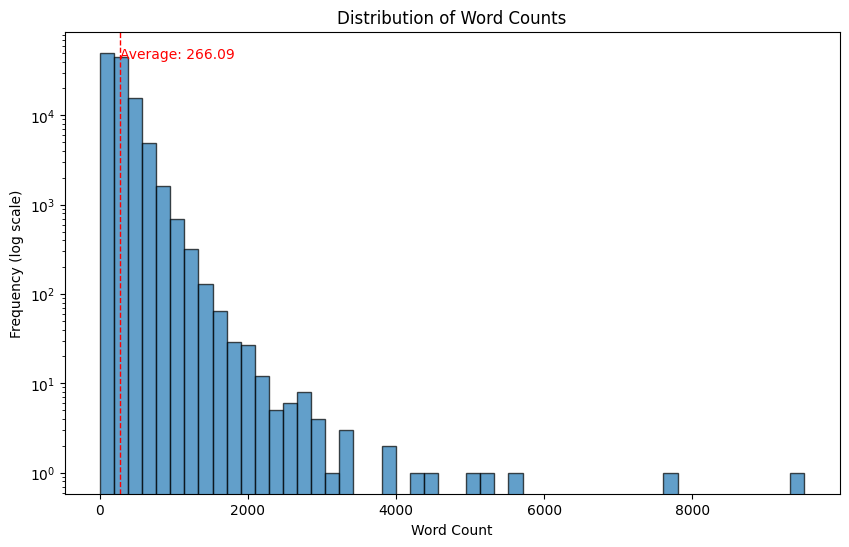

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


dataset['Word_Count'] = dataset['Text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(10, 6))
plt.hist(dataset['Word_Count'], bins=50, edgecolor='k', alpha=0.7) 
plt.yscale('log') 

average_word_count = dataset['Word_Count'].mean()
plt.axvline(average_word_count, color='r', linestyle='dashed', linewidth=1)
plt.text(average_word_count + 5, plt.ylim()[1] / 2, f'Average: {average_word_count:.2f}', color='r')  

plt.xlabel('Word Count')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Word Counts')

plt.show()


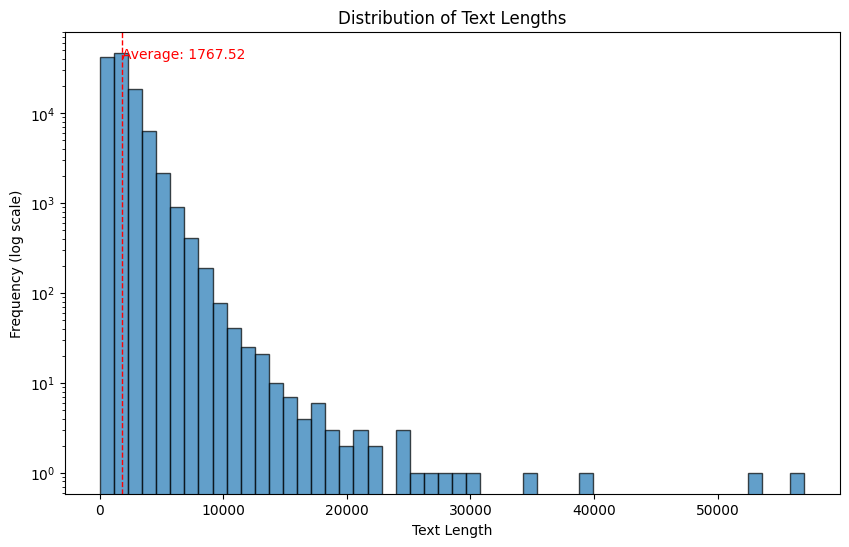

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


dataset['Text_Length'] = dataset['Text'].apply(len)


plt.figure(figsize=(10, 6))
plt.hist(dataset['Text_Length'], bins=50, edgecolor='k', alpha=0.7)  
plt.yscale('log')  

average_length = dataset['Text_Length'].mean()
plt.axvline(average_length, color='r', linestyle='dashed', linewidth=1)
plt.text(average_length + 5, plt.ylim()[1] / 2, f'Average: {average_length:.2f}', color='r')  

plt.xlabel('Text Length')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Text Lengths')


plt.show()


In [ ]:
dataset.shape

(118404, 6)

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', None)  

sample_rows = dataset["Text"].head(5)
sample_rows


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"         
                           u"\u2000-\u206F"          

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text



def remove_punctuations(text):
    
    eng_punctuations = r"""!#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""

   
    bn_punctuations = "".join([chr(c) for c in range(0x0964, 0x0970)])

   
    punctuations = eng_punctuations + bn_punctuations

    
    no_punct = re.sub(rf'[{re.escape(punctuations)}]', '', text)

    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
dataset['Text'] = dataset.Text.apply(lambda x: preprocessing(str(x)))


In [ ]:
import pandas as pd


pd.set_option('display.max_colwidth', None) 

sample_rows = dataset["Text"].head(5)
sample_rows


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
cleaned_dataset = dataset.copy()

In [ ]:
def clean_text(text):
  
    cleaned_text = text.replace('\n', ' ').replace('  ', ' ').strip()
    return cleaned_text


cleaned_dataset['Text'] = cleaned_dataset['Text'].apply(clean_text)


pd.set_option('display.max_colwidth', None)  
cleaned_dataset['Text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ANDAJE/stopwords_bangla.xlsx')
stop = data['words'].tolist()

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)


In [ ]:
sample_rows = cleaned_dataset["Text"].head(5)
sample_rows

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
cleaned_dataset['Text'] = cleaned_dataset.Text.apply(lambda x: stopwordRemoval(str(x)))

In [ ]:
sample_rows = cleaned_dataset["Text"].head(5)
sample_rows

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                গ্যাটকো দুর্নীতি মামলায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ আসামির বিরুদ্ধে অভিযোগ গঠনের শুনানির পিছিয়ে ২৫ সেপ্টেম্বর ধার্য আদালতবৃহস্পতিবার কেরানীগঞ্জ কেন্দ্রীয় কারাগারের জজ আদালত৩ বিচারক আবু সৈয়দ দিলজার হোসেনের আদালতে মামলাটি চার্জ শ

<Axes: xlabel='count', ylabel='Category'>

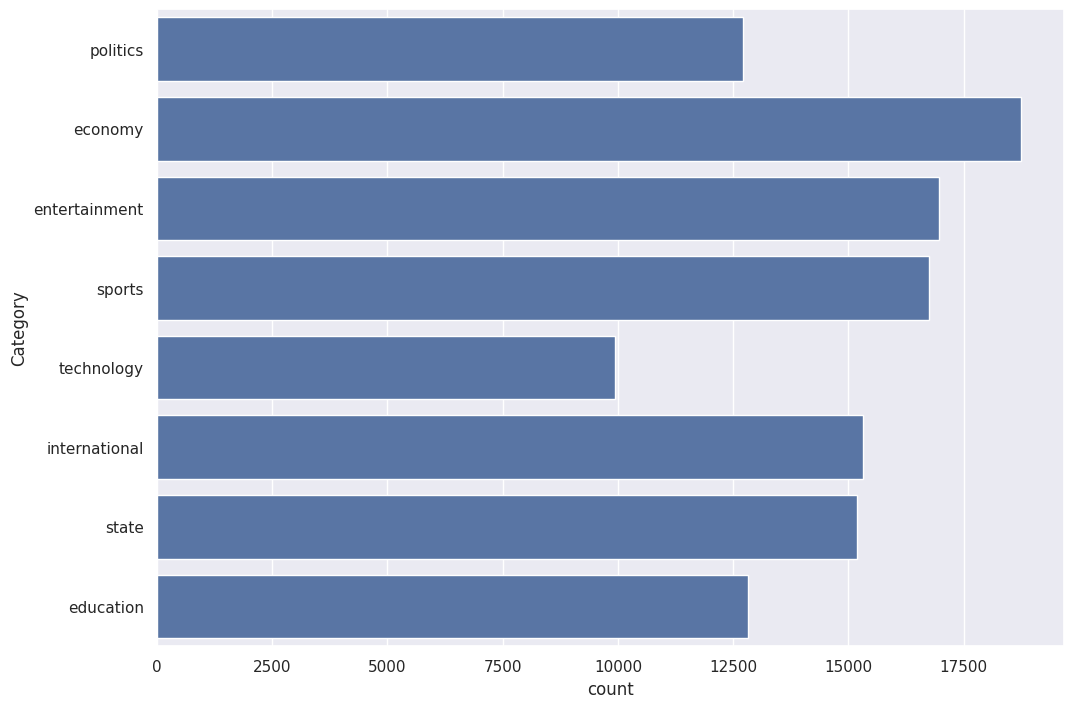

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(dataset['Category'])

In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
cleaned_dataset['Text']=cleaned_dataset['Text'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules

In [ ]:
sample_rows = cleaned_dataset["Text"].head(5)
sample_rows

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         গ্যাটকো দুর্নীতি মামলায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ আসামির বিরুদ্ধে অভিযোগ গঠন শুনানির পিছিয়ে ২৫ সেপ্টেম্বর ধার্য আদালতবৃহস্পতিব কেরানীগঞ্জ কেন্দ্রীয় কারাগারের জজ আদালত৩ বিচারক আবু সৈয়দ দিলজ হোসেনের আদাল মামলা চার্জ শুনানির ধার্য খালেদা জিয়া হাসপাতালে চিকিৎসাধীন এদিন আদাল হাজির করে

In [ ]:
cleaned_dataset

Category  \
0         politics   
1          economy   
2         politics   
3         politics   
4         politics   
...            ...   
118399      sports   
118400      sports   
118401  technology   
118402      sports   
118403     economy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            গ্যাটকো দুর্নীতি মামলায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ আসামির বিরুদ্ধে অভিযোগ গঠন শুনানির পিছিয়ে ২৫ সেপ্টেম্বর ধার্য আদালতবৃহস্পতিব কেরানীগঞ্জ কেন্দ্রীয় কারাগারের জজ আদালত৩ বিচারক আবু সৈয়দ দিলজ হোসেনের আদাল মামলা চার্জ শুনানির ধার্য খালেদা জিয়া হাসপাতালে চিকিৎসাধীন এদিন আদাল হাজির করেনি কার কর্তৃপক্ষশুনানি খালেদা জিয় আইনজীবীরা আদালত খালেদা জিয়া অসুস্থ হাসপাতালে ভর্তি রয়েছেন অবস্থায় আসামির অনুপস্থিতি চার্জ শুনানি আইনসম্মত না এজন্য চার্জ শুনানি পেছানোর সময় আবেদন হচ্ছেএসময় দুদক আইনজীবী মোশারফ হোস কাজল আদাল উপস্থিত ছিলেনসবশেষ ২৪ জানুয়ারি খালেদা জিয়া কারা আদাল হাজির ওইদিন খালেদা আদাল বসানোর স্থান আপত্তি জানিয়েছিলেনদুর্নীতির মামলায় দণ্ডিত বছর ৮ ফেব্রুয়ারি কারাবন্দি খালেদা জিয়া হাঁটুর সমস্যাসহ জটিল রোগে খালেদা জিয়া বর্তমানে বঙ্গবন্ধু শেখ মুজিব মেডিকেল বিশ্ববিদ্যালয় বিএসএমএমইউ চিকিৎসাধীন কয়েকব শুনানির থাকলে অসুস্থত কারণে আদাল হাজির হয়নি২০০৭ সাল ২ সেপ্টেম্বর রাজধানীর তেজগাঁ থানায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ ১৩ বিরুদ্ধে গ্যাটকো মামলা দুর্নীতি দমন কমিশন দুদক দুদক উপপরিচালক গোল শাহরিয় চৌধুরী মামল বাদীমামল অভিযোগে ক্ষমত অপব্যব

In [ ]:
cleaned_dataset.to_csv('/content/drive/MyDrive/ANDAJE/preprocessed_news_article.csv', index=False)

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"         
                           u"\u2000-\u206F"         

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char


    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out
cleaned_dataset_v1 = dataset.copy()



In [ ]:
cleaned_dataset_v1

Category  \
0         politics   
1          economy   
2         politics   
3         politics   
4         politics   
...            ...   
118399      sports   
118400      sports   
118401  technology   
118402      sports   
118403     economy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
cleaned_dataset['Text'] = cleaned_dataset.Text.apply(lambda x: preprocessing(str(x)))

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              গ্যাটকো দুর্নীতি মামলায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ আসামির বিরুদ্ধে অভিযোগ গঠন শুনানির পিছিয়ে  সেপ্টেম্বর ধার্য আদালতবৃহস্পতিব কেরানীগঞ্জ কেন্দ্রীয় কারাগারের জজ আদালত বিচারক আবু সৈয়দ দিলজ হোসেনের আদাল মামলা চার্জ শুনানির ধার্য খালেদা জিয়া হাসপাতালে চিকিৎসাধীন এ

In [ ]:
cleaned_dataset

Category  \
0         politics   
1          economy   
2         politics   
3         politics   
4         politics   
...            ...   
118399      sports   
118400      sports   
118401  technology   
118402      sports   
118403     economy   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 গ্যাটকো দুর্নীতি মামলায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ আসামির বিরুদ্ধে অভিযোগ গঠন শুনানির পিছিয়ে  সেপ্টেম্বর ধার্য আদালতবৃহস্পতিব কেরানীগঞ্জ কেন্দ্রীয় কারাগারের জজ আদালত বিচারক আবু সৈয়দ দিলজ হোসেনের আদাল মামলা চার্জ শুনানির ধার্য খালেদা জিয়া হাসপাতালে চিকিৎসাধীন এদিন আদাল হাজির করেনি কার কর্তৃপক্ষশুনানি খালেদা জিয় আইনজীবীরা আদালত খালেদা জিয়া অসুস্থ হাসপাতালে ভর্তি রয়েছেন অবস্থায় আসামির অনুপস্থিতি চার্জ শুনানি আইনসম্মত না এজন্য চার্জ শুনানি পেছানোর সময় আবেদন হচ্ছেএসময় দুদক আইনজীবী মোশারফ হোস কাজল আদাল উপস্থিত ছিলেনসবশেষ  জানুয়ারি খালেদা জিয়া কারা আদাল হাজির ওইদিন খালেদা আদাল বসানোর স্থান আপত্তি জানিয়েছিলেনদুর্নীতির মামলায় দণ্ডিত বছর  ফেব্রুয়ারি কারাবন্দি খালেদা জিয়া হাঁটুর সমস্যাসহ জটিল রোগে খালেদা জিয়া বর্তমানে বঙ্গবন্ধু শেখ মুজিব মেডিকেল বিশ্ববিদ্যালয় বিএসএমএমইউ চিকিৎসাধীন কয়েকব শুনানির থাকলে অসুস্থত কারণে আদাল হাজির হয়নি সাল  সেপ্টেম্বর রাজধানীর তেজগাঁ থানায় বিএনপি চেয়ারপারসন খালেদা জিয়াসহ  বিরুদ্ধে গ্যাটকো মামলা দুর্নীতি দমন কমিশন দুদক দুদক উপপরিচালক গোল শাহরিয় চৌধুরী মামল বাদীমামল অভিযোগে ক্ষম

In [ ]:
cleaned_dataset.to_csv('/content/drive/MyDrive/ANDAJE/preprocessed_news_article_removing_numbers.csv', index=False)

In [ ]:
category_counts = cleaned_dataset['Category'].value_counts()
categories = category_counts.index
counts = category_counts.values

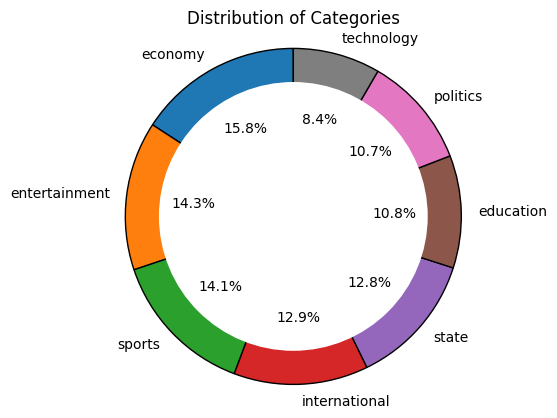

In [ ]:
labels = categories
sizes = counts

fig, ax = plt.subplots()


ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})


centre_circle = plt.Circle((0,0),0.80,fc='white')
fig.gca().add_artist(centre_circle)


ax.axis('equal')

plt.title('Distribution of Categories')
plt.show()

In [ ]:

category_list = cleaned_dataset['Category'].unique()
def get_ngrams(data,n):
    all_words = []
    for i in range(len(data)):
        temp = data["Text"][i].split()
        for word in temp:
            all_words.append(word)

    tokenized = all_words
    esBigrams = ngrams(tokenized, n)

    esBigram_wordlist = nltk.FreqDist(esBigrams)
    top20 = esBigram_wordlist.most_common(20)
    top20 = dict(top20)
    df_ngrams = pd.DataFrame(sorted(top20.items(), key=lambda x: x[1])[::-1])
    df_ngrams.columns = ['Ngram','count']
    return df_ngrams



def show(train):
    display(train.head(20))

In [ ]:
for i in category_list:
    temp=cleaned_dataset.loc[cleaned_dataset['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_unigrams = get_ngrams(temp,1)
    print("\t\t\t====== Unigrams of "+str(i)+"======")
    show(train_unigrams)

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of politics======


Ngram  count
0         (না,)  27521
1        (লীগ,)  24555
2         (দল,)  23845
3     (আওয়ামী,)  22028
4    (সম্পাদক,)  19137
5   (নির্বাচন,)  18741
6    (বিএনপির,)  18205
7     (বিএনপি,)  17012
8      (জাতীয়,)  15927
9       (নেতা,)  15534
10    (খালেদা,)  14454
11       (কথা,)  12714
12     (রহমান,)  12535
13    (সভাপতি,)  10630
14        (ইস,)  10629
15      (ঢাকা,)  10426
16       (হোস,)  10260
17       (কমি,)  10156
18       (সময়,)  10061
19       (সরক,)   9921

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of economy======


Ngram  count
0         (টাকা,)  48555
1       (ব্যাংক,)  46600
2     (বাংলাদেশ,)  28501
3           (না,)  27290
4        (শতাংশ,)  26030
5          (লাখ,)  20720
6          (খাত,)  17742
7   (প্রতিষ্ঠান,)  17703
8          (দাম,)  17403
9          (বাড়,)  16472
10          (ঋণ,)  15643
11         (দেশ,)  15047
12         (সময়,)  14697
13       (দশমিক,)  12802
14       (দেশের,)  12727
15        (বিষয়,)  12020
16     (পরিচালক,)  11172
17  (বাংলাদেশের,)  10059
18          (ডল,)   9858
19        (অর্থ,)   9565

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of entertainment======


Ngram  count
0         (ছবি,)  36122
1          (না,)  24600
2         (গান,)  23762
3        (ছবির,)  15982
4       (অভিনয়,)  14457
5         (কথা,)  13622
6         (সময়,)  12937
7         (খান,)  12131
8        (নাটক,)  10877
9   (চলচ্চিত্র,)  10260
10    (পরিচালক,)   7877
11         (এক,)   7516
12   (অনুষ্ঠান,)   7316
13        (যায়,)   7238
14      (হিসেব,)   7020
15       (ভালো,)   6897
16     (মুক্তি,)   6846
17     (শিল্পী,)   6815
18       (গল্প,)   6631
19      (বলিউড,)   6191

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of sports======


Ngram  count
0           (না,)  38383
1           (দল,)  34786
2        (ম্যাচ,)  25889
3          (রান,)  22546
4        (উইকেট,)  16383
5       (ম্যাচে,)  15452
6     (বাংলাদেশ,)  14921
7          (খেল,)  14654
8      (বিপক্ষে,)  13798
9          (গোল,)  12696
10          (এক,)  12253
11          (বল,)  11976
12         (সময়,)  11846
13         (কথা,)  11842
14     (ক্রিকেট,)  11673
15        (ভালো,)  10627
16  (বাংলাদেশের,)  10230
17    (বিশ্বকাপ,)   9610
18       (টেস্ট,)   9364
19          (জয়,)   9205

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of technology======


Ngram  count
0    (প্রতিষ্ঠান,)  10124
1            (না,)  10029
2        (ফেসবুক,)   7861
3          (তথ্য,)   7686
4          (তৈরি,)   6723
5           (ফোন,)   6462
6           (সময়,)   6084
7      (বাংলাদেশ,)   6058
8    (স্মার্টফোন,)   5965
9          (গুগল,)   5926
10        (হিসেব,)   5615
11        (অ্যাপ,)   5457
12         (বিষয়,)   5111
13    (প্রযুক্তি,)   4951
14          (যায়,)   4558
15         (টাকা,)   4556
16       (বাজারে,)   4422
17  (ব্যবহারকারী,)   4365
18       (মোবাইল,)   4308
19         (সেবা,)   3840

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of international======


Ngram  count
0              (না,)  17743
1             (দেশ,)  14038
2              (দল,)  10997
3     (প্রেসিডেন্ট,)  10445
4             (কথা,)   9597
5             (সময়,)   9444
6            (ভারত,)   9311
7           (গতকাল,)   9126
8           (পুলিশ,)   7461
9            (বিষয়,)   7372
10   (যুক্তরাষ্ট্র,)   7187
11          (হিসেব,)   7122
12       (বিরুদ্ধে,)   6879
13           (নেতা,)   6716
14            (সরক,)   6556
15        (ট্রাম্প,)   6427
16        (মার্কিন,)   6346
17           (সালে,)   6203
18  (প্রধানমন্ত্রী,)   5996
19           (দাবি,)   5581

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of state======


Ngram  count
0          (না,)  19147
1       (পুলিশ,)  14038
2       (গতকাল,)  11479
3        (টাকা,)   9668
4         (সময়,)   9169
5   (কর্মকর্তা,)   8429
6         (কথা,)   7943
7       (রহমান,)   7477
8       (জানান,)   7440
9         (লীগ,)   7319
10      (উপজেল,)   7126
11       (জেলা,)   7076
12         (ইস,)   6945
13       (বিষয়,)   6832
14         (মো,)   6666
15     (উপজেলা,)   6498
16       (ঢাকা,)   6463
17        (রাত,)   6399
18        (যায়,)   6157
19         (দল,)   6136

<ipython-input-77-c35d3788dc85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Unigrams of education======


Ngram  count
0               (খ,)  51275
1               (ঘ,)  49339
2               (গ,)  38656
3               (ক,)  27193
4   (বিশ্ববিদ্যালয়,)  21762
5      (শিক্ষার্থী,)  16376
6              (না,)  14684
7             (কোন,)  11808
8            (ঢাকা,)  10068
9          (প্রশ্ন,)   9956
10           (বিষয়,)   8929
11         (শিক্ষক,)   8388
12            (সময়,)   8328
13           (কলেজ,)   7712
14            (যায়,)   7095
15          (বিভাগ,)   6977
16        (অধ্যাপক,)   6320
17        (পরীক্ষা,)   5902
18            (নিচ,)   5485
19       (বাংলাদেশ,)   5454

In [ ]:
for i in category_list:
    temp=cleaned_dataset.loc[cleaned_dataset['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_bigrams = get_ngrams(temp,2)
    print("\t\t\t====== Bigrams of "+str(i)+" ======")
    show(train_bigrams)

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of politics ======


Ngram  count
0          (আওয়ামী, লীগ)  20631
1          (খালেদা, জিয়)   6747
2         (খালেদা, জিয়া)   6306
3        (মির্জা, ফখরুল)   4116
4       (ওবায়দুল, কাদের)   3675
5         (লীগ, সম্পাদক)   3553
6          (শেখ, হাসিনা)   3203
7          (জাতীয়, পার্)   3174
8   (বিএনপি, চেয়ারপারসন)   2995
9      (নির্বাচন, কমিশন)   2933
10         (স্থায়ী, কমি)   2879
11           (ফখরুল, ইস)   2796
12            (এসব, কথা)   2656
13  (প্রধানমন্ত্রী, শেখ)   2545
14          (শেখ, হাসিন)   2539
15      (যুগ্ম, মহাসচিব)   2531
16  (চেয়ারপারসন, খালেদা)   2401
17            (ড, কামাল)   2384
18   (জাতীয়, ঐক্যফ্রন্ট)   2361
19     (মহাসচিব, মির্জা)   2357

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of economy ======


Ngram  count
0              (লাখ, টাকা)   9033
1       (বাংলাদেশ, ব্যাংক)   8089
2           (দশমিক, শতাংশ)   7704
3   (ব্যবস্থাপনা, পরিচালক)   3837
4      (কেন্দ্রীয়, ব্যাংক)   2979
5               (দাম, বাড়)   2579
6        (স্টক, এক্সচেঞ্জ)   2096
7             (খেলাপি, ঋণ)   2015
8                (লাখ, ডল)   1960
9          (চলতি, অর্থবছর)   1849
10            (শেয়ার, দাম)   1713
11    (আর্থিক, প্রতিষ্ঠান)   1666
12               (আগ, দিন)   1642
13           (তৈরি, পোশাক)   1568
14            (ঢাকা, স্টক)   1539
15         (বেসরকারি, খাত)   1536
16      (প্রধান, নির্বাহী)   1529
17      (সংবাদ, বিজ্ঞপ্তি)   1434
18      (স্টক, এক্সচেঞ্জে)   1430
19     (নির্বাহী, পরিচালক)   1430

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of entertainment ======


Ngram  count
0         (চরিত্রে, অভিনয়)   2302
1            (মুক্তি, পায়)   2302
2             (শাকিব, খান)   2093
3             (ছবি, অভিনয়)   2070
4            (সালমান, খান)   1581
5            (ছবি, মুক্তি)   1539
6            (শাহরুখ, খান)   1232
7            (ছবির, শুটিং)   1199
8           (মুক্তি, পাবে)   1056
9           (বলিউড, তারকা)   1021
10         (অমিতাভ, বচ্চন)    917
11             (আমির, খান)    800
12  (প্রযোজনা, প্রতিষ্ঠান)    785
13    (বাংলাদেশ, শিল্পকলা)    744
14         (ছবির, পরিচালক)    726
15          (ছবি, মুক্তির)    724
16    (শিল্পকলা, একাডেমির)    695
17            (টা, মিনিটে)    664
18       (চলচ্চিত্র, উৎসব)    646
19             (ভালো, লাগ)    628

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of sports ======


Ngram  count
0              (জাতীয়, দল)   2434
1           (বাংলাদেশ, দল)   2284
2         (ওয়েস্ট, ইন্ডিজ)   2251
3         (দক্ষিণ, আফ্রিক)   1535
4        (দক্ষিণ, আফ্রিকা)   1509
5             (উইকেট, রান)   1472
6                (পার, না)   1410
7       (চ্যাম্পিয়নস, লিগ)   1377
8              (আল, হাসান)   1349
9              (সাকিব, আল)   1349
10           (রানে, উইকেট)   1329
11       (সংবাদ, সম্মেলনে)   1191
12            (ওভারে, রান)   1143
13            (ম্যাচ, খেল)   1113
14  (আন্তর্জাতিক, ক্রিকেট)   1066
15               (সবচ, বড়)   1006
16            (ম্যাচ, শাষ)    983
17        (রিয়াল, মাদ্রিদ)    932
18          (প্রিমিয়, লিগ)    924
19            (রান, ইনিংস)    917

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of technology ======


Ngram  count
0        (প্রধান, নির্বাহী)   1561
1             (মোবাইল, ফোন)   1176
2       (অপারেটিং, সিস্টেম)   1055
3        (সামাজিক, যোগাযোগ)    984
4    (নির্মাতা, প্রতিষ্ঠান)    815
5     (নির্বাহী, কর্মকর্তা)    709
6             (মার্কিন, ডল)    699
7    (ব্যবস্থাপনা, পরিচালক)    665
8               (আই, ডেস্ক)    550
9      (স্মার্টফোন, বাজারে)    522
10                (সবচ, বড়)    501
11             (পাওয়া, যায়)    493
12              (দাম, টাকা)    484
13      (ফেসবুক, কর্তৃপক্ষ)    463
14          (তথ্য, যোগাযোগ)    450
15     (যোগাযোগ, প্রযুক্তি)    430
16              (চলতি, বছর)    404
17  (প্রযুক্তি, প্রতিষ্ঠান)    402
18             (ইঞ্চি, মাপ)    400
19    (ফেসবুক, ব্যবহারকারী)    390

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of international ======


Ngram  count
0      (মার্কিন, প্রেসিডেন্ট)   1410
1          (ডোনাল্ড, ট্রাম্প)   1286
2            (বার্তা, সংস্থা)   1070
3   (প্রধানমন্ত্রী, নরেন্দ্র)    974
4                (বেশির, ভাগ)    893
5             (গতকাল, মঙ্গলব)    868
6               (গতকাল, বুধব)    864
7        (প্রেসিডেন্ট, বারাক)    843
8             (গতকাল, শুক্রব)    821
9          (গতকাল, বৃহস্পতিব)    799
10           (নরেন্দ্র, মোদি)    778
11               (বিরোধী, দল)    746
12              (গতকাল, শনিব)    729
13                (ঘটনা, ঘটে)    724
14              (গতকাল, সোমব)    698
15           (সুপ্রিম, কোর্ট)    684
16          (নির্বাচন, কমিশন)    682
17             (রাজনৈতিক, দল)    670
18             (বারাক, ওবামা)    665
19       (অনলাইন, প্রতিবেদনে)    646

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of state ======


Ngram  count
0             (আওয়ামী, লীগ)   5563
1               (লাখ, টাকা)   2346
2           (মেডিকেল, কলেজ)   1957
3   (ভারপ্রাপ্ত, কর্মকর্তা)   1929
4        (থানা, ভারপ্রাপ্ত)   1826
5          (কর্মকর্তা, ওসি)   1748
6           (জেলা, প্রশাসক)   1303
7          (সিটি, করপোরেশন)   1279
8               (লাশ, উদ্ধ)   1187
9         (কলেজ, হাসপাতালে)   1119
10            (শেখ, হাসিনা)   1108
11             (পুলিশ, সুপ)   1093
12          (গতকাল, মঙ্গলব)   1043
13             (সদর, উপজেল)   1026
14           (আওয়ামী, লীগ)   1008
15            (গতকাল, বুধব)    980
16       (গতকাল, বৃহস্পতিব)    980
17     (প্রধানমন্ত্রী, শেখ)    970
18            (গতকাল, শনিব)    908
19        (নির্বাচন, কমিশন)    905

<ipython-input-78-15eaa975b802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of education ======


Ngram  count
0                  (খ, গ)  10688
1                  (গ, ঘ)  10281
2                  (ক, খ)   5703
3              (নিচ, কোন)   2990
4   (ঢাকা, বিশ্ববিদ্যালয়)   2918
5            (অধ্যাপক, ড)   2593
6            (কলেজ, ঢাকা)   2158
7              (সঠিকক, খ)   2143
8            (কোন, সঠিকক)   2045
9             (কোন, সঠিক)   1950
10                 (ঘ, ক)   1890
11              (সঠিক, ক)   1811
12        (অ্যান্ড, কলেজ)   1657
13                 (গ, ক)   1640
14        (নম্বর, প্রশ্ন)   1636
15                 (খ, ক)   1635
16                 (ক, গ)   1593
17                 (গ, খ)   1481
18       (ভর্তি, পরীক্ষা)   1430
19                 (ঘ, খ)   1420

In [ ]:
for i in category_list:
    temp=cleaned_dataset.loc[cleaned_dataset['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_bigrams = get_ngrams(temp,3)
    print("\t\t\t====== Bigrams of "+str(i)+" ======")
    show(train_bigrams)

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of politics ======


Ngram  count
0         (আওয়ামী, লীগ, সম্পাদক)   2977
1            (মির্জা, ফখরুল, ইস)   2657
2       (মহাসচিব, মির্জা, ফখরুল)   2346
3            (ফখরুল, ইস, আলমগীর)   2178
4   (বিএনপি, চেয়ারপারসন, খালেদা)   1770
5          (আওয়ামী, লীগ, সভাপতি)   1740
6   (প্রধানমন্ত্রী, শেখ, হাসিনা)   1368
7           (একাদশ, জাতীয়, সংসদ)   1317
8      (চেয়ারপারসন, খালেদা, জিয়)   1300
9         (বিএনপির, স্থায়ী, কমি)   1261
10          (রুহুল, কবির, রিজভী)   1243
11      (সিনিয়র, যুগ্ম, মহাসচিব)   1225
12       (যুগ্ম, মহাসচিব, রুহুল)   1204
13      (জাতীয়, সংসদ, নির্বাচনে)   1193
14        (মহাসচিব, রুহুল, কবির)   1186
15           (জেলা, আওয়ামী, লীগ)   1143
16               (ড, কামাল, হোস)   1088
17   (প্রধানমন্ত্রী, শেখ, হাসিন)   1012
18        (ঢাকা, মহানগর, দক্ষিণ)    977
19     (বিএনপি, মহাসচিব, মির্জা)    948

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of economy ======


Ngram  count
0   (ব্যাংক, ব্যবস্থাপনা, পরিচালক)   1060
1          (স্টক, এক্সচেঞ্জ, ডিএস)   1051
2          (ঢাকা, স্টক, এক্সচেঞ্জ)   1017
3           (জাতীয়, রাজস্ব, বোর্ড)   1006
4               (আবুল, মাল, আবদুল)    996
5         (অর্থমন্ত্রী, আবুল, মাল)    944
6              (মাল, আবদুল, মুহিত)    933
7              (চেম্ব, অব, কমার্স)    919
8          (রাজস্ব, বোর্ড, এনবিআর)    847
9     (ব্যাংক, আর্থিক, প্রতিষ্ঠান)    802
10   (প্রধান, নির্বাহী, কর্মকর্তা)    767
11           (অব, কমার্স, অ্যান্ড)    725
12                       (আ, হ, ম)    660
13                 (হ, ম, মুস্তফা)    659
14             (ম, মুস্তফা, কামাল)    631
15      (বাংলাদেশ, ব্যাংক, গভর্নর)    626
16   (চট্টগ্রাম, স্টক, এক্সচেঞ্জে)    603
17          (শেয়, মিউচুয়াল, ফান্ড)    590
18           (বাড়, কম, অপরিবর্তিত)    576
19     (আর্থিক, প্রতিষ্ঠান, বিভাগ)    548

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of entertainment ======


Ngram  count
0                     (ছবি, মুক্তি, পায়)    453
1             (জাতীয়, চলচ্চিত্র, পুরস্ক)    393
2                       (সাইফ, আলী, খান)    320
3                   (টাইমস, অব, ইন্ডিয়া)    289
4             (রমজান, উপলক্ষে, অনুষ্ঠান)    266
5         (বাংলাদেশ, শিল্পকলা, একাডেমির)    264
6                    (ছবি, মুক্তি, পাবে)    263
7                   (কারিনা, কাপুর, খান)    255
8                      (রাত, টা, মিনিটে)    245
9            (প্রেক্ষাগৃহে, মুক্তি, পায়)    229
10                     (শাকিব, খান, অপু)    228
11                      (সেলিম, আল, দীন)    225
12  (সংস্কৃতিমন্ত্রী, আসাদুজ্জামান, নূর)    212
13                    (মুক্তি, পায়, ছবি)    203
14                 (সালে, মুক্তি, পাওয়া)    197
15           (শিল্পকলা, একাডেমির, জাতীয়)    187
16                    (তারিক, আনাম, খান)    183
17                   (গান, কথা, লিখেছেন)    178
18                (সুর, সংগীত, পরিচালনা)    171
19        (আন্তর্জাতিক, চলচ্চিত্র, উৎসব)    168

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of sports ======


Ngram  count
0                (সাকিব, আল, হাসান)   1273
1           (মাশরাফি, বিন, মুর্তজা)    487
2         (দক্ষিণ, আফ্রিক, বিপক্ষে)    433
3         (ওয়েস্ট, ইন্ডিজ, বিপক্ষে)    374
4            (মেহেদী, হাসান, মিরাজ)    302
5               (রানে, উইকেট, হারা)    262
6              (এবি, ডি, ভিলিয়ার্স)    254
7                    (খেল, পার, না)    212
8           (সভাপতি, নাজমুল, হাসান)    212
9            (মাশরাফি, বিন, মুর্তজ)    205
10  (মিরপুর, শেরেবাংলা, স্টেডিয়ামে)    195
11            (মহেন্দ্র, সিং, ধোনি)    190
12       (বাংলাদেশ, ক্রিকেট, বোর্ড)    174
13               (ম্যান, অব, ম্যাচ)    173
14            (সংযুক্ত, আর, আমিরাত)    166
15         (বাংলাদেশ, অনূর্ধ্ব, দল)    157
16          (অধিনায়ক, মাশরাফি, বিন)    153
17         (ভারতীয়, ক্রিকেট, বোর্ড)    150
18           (শেখ, জামাল, ধানমন্ডি)    147
19               (উইকেট, হারা, রান)    143

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of technology ======


Ngram  count
0           (প্রধান, নির্বাহী, কর্মকর্তা)    647
1              (তথ্য, যোগাযোগ, প্রযুক্তি)    402
2                (গিবা, হার্ডডিস্ক, টাকা)    314
3           (প্রতিমন্ত্রী, জুনাইদ, আহমেদ)    262
4                    (জুনাইদ, আহমেদ, পলক)    221
5       (বঙ্গবন্ধু, আন্তর্জাতিক, সম্মেলন)    219
6        (আন্তর্জাতিক, সম্মেলন, কেন্দ্রে)    191
7            (বাংলাদেশ, অ্যাসোসিয়েশন, অব)    184
8                  (অব, সফটওয়্য, অ্যান্ড)    169
9                 (অতিথি, হিসেব, উপস্থিত)    168
10           (সফটওয়্য, অ্যান্ড, ইনফরমেশন)    159
11            (অ্যাসোসিয়েশন, অব, সফটওয়্য)    156
12           (বাংলাদেশ, কম্পিউ, কাউন্সিল)    156
13                 (মোবাইল, ফোন, অপারেটর)    151
14            (প্রসেসর, গিবা, হার্ডডিস্ক)    149
15  (প্রযুক্তিপণ্য, নির্মাতা, প্রতিষ্ঠান)    145
16                    (জিবি, র্যাম, জিবি)    144
17            (যোগাযোগ, প্রযুক্তি, বিভাগ)    142
18           (উইন্ডোজ, অপারেটিং, সিস্টেম)    140
19      (লিমিটেডের, ব্যবস্থাপনা, পরিচালক)    139

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of international ======


Ngram  count
0        (প্রেসিডেন্ট, ডোনাল্ড, ট্রাম্প)    577
1            (প্রেসিডেন্ট, বারাক, ওবামা)    565
2          (মার্কিন, প্রেসিডেন্ট, বারাক)    457
3        (প্রধানমন্ত্রী, নরেন্দ্র, মোদি)    417
4        (ভারত, প্রধানমন্ত্রী, নরেন্দ্র)    396
5        (প্রেসিডেন্ট, ভ্লাদিমির, পুতিন)    360
6           (বিবিসি, অনলাইন, প্রতিবেদনে)    349
7               (ইসলামিক, স্টেটের, আইএস)    337
8   (মুখ্যমন্ত্রী, মমতা, বন্দ্যোপাধ্যায়)    323
9                 (ইসলামিক, স্টেট, আইএস)    305
10       (মার্কিন, প্রেসিডেন্ট, ডোনাল্ড)    293
11                    (হামল, দায়, স্বীক)    261
12      (পশ্চিমবঙ্গ, মুখ্যমন্ত্রী, মমতা)    258
13                         (অং, সান, সু)    245
14            (অনলাইন, প্রতিবেদনে, তথ্য)    244
15      (প্রধানমন্ত্রী, নরেন্দ্র, মোদির)    231
16               (মোহাম্মদ, বিন, সালমান)    228
17                  (টাইমস, অব, ইন্ডিয়া)    219
18              (প্রেসিডেন্ট, বারাক, ওব)    213
19              (বার্তা, সংস্থা, এএফপির)    210

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of state ======


Ngram  count
0     (থানা, ভারপ্রাপ্ত, কর্মকর্তা)   1796
1      (ভারপ্রাপ্ত, কর্মকর্তা, ওসি)   1742
2        (মেডিকেল, কলেজ, হাসপাতালে)   1118
3             (ঢাকা, মেডিকেল, কলেজ)    679
4             (উপজেলা, আওয়ামী, লীগ)    659
5     (উপজেলা, নির্বাহী, কর্মকর্তা)    642
6      (প্রধানমন্ত্রী, শেখ, হাসিনা)    633
7             (আওয়ামী, লীগ, সভাপতি)    594
8         (মেডিকেল, কলেজ, হাসপাতাল)    548
9            (আওয়ামী, লীগ, সম্পাদক)    525
10              (জেলা, আওয়ামী, লীগ)    523
11     (নির্বাহী, কর্মকর্তা, ইউএনও)    518
12  (উপজেলা, স্বাস্থ্য, কমপ্লেক্সে)    493
13          (থানা, উপপরিদর্শক, এসআ)    471
14             (ইউনিয়ন, পরিষ, ইউপি)    369
15       (উপজেলা, পরিষ, চেয়ারম্যান)    328
16         (কলেজ, হাসপাতালে, ভর্তি)    305
17      (প্রধানমন্ত্রী, শেখ, হাসিন)    304
18              (আওয়ামী, লীগ, নেতা)    293
19              (মির্জা, ফখরুল, ইস)    283

<ipython-input-79-9d737f385c4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


			====== Bigrams of education ======


Ngram  count
0                             (খ, গ, ঘ)   8361
1                             (ক, খ, গ)   3779
2                         (সঠিকক, খ, গ)   2035
3                       (কোন, সঠিকক, খ)   1938
4                      (নিচ, কোন, সঠিক)   1707
5                        (কোন, সঠিক, ক)   1672
6                          (সঠিক, ক, খ)   1509
7                (স্কুল, অ্যান্ড, কলেজ)   1302
8                             (গ, ঘ, ক)    857
9                             (ঘ, ক, খ)    685
10                (অ্যান্ড, কলেজ, ঢাকা)    655
11  (বিজ্ঞান, প্রযুক্তি, বিশ্ববিদ্যালয়)    649
12                 (পাবলিক, কলেজ, ঢাকা)    642
13                     (অধ্যাপক, ড, মো)    631
14                            (গ, ক, খ)    546
15               (উপাচার্য, অধ্যাপক, ড)    530
16                (শেখ, মুজিবুর, রহমান)    530
17                            (গ, ঘ, ঘ)    529
18                    (নং, প্রশ্ন, দাও)    526
19                          (কতক, খ, গ)    509

In [ ]:

from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager


def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/Siyamrupali.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


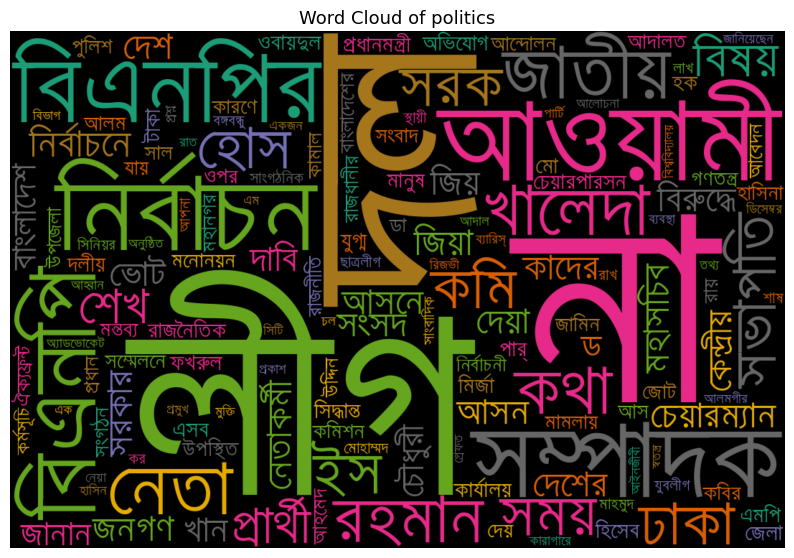

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


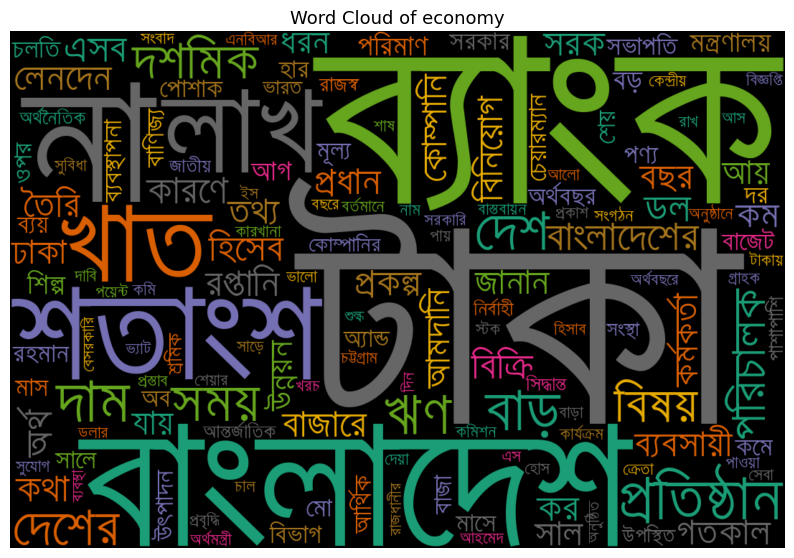

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


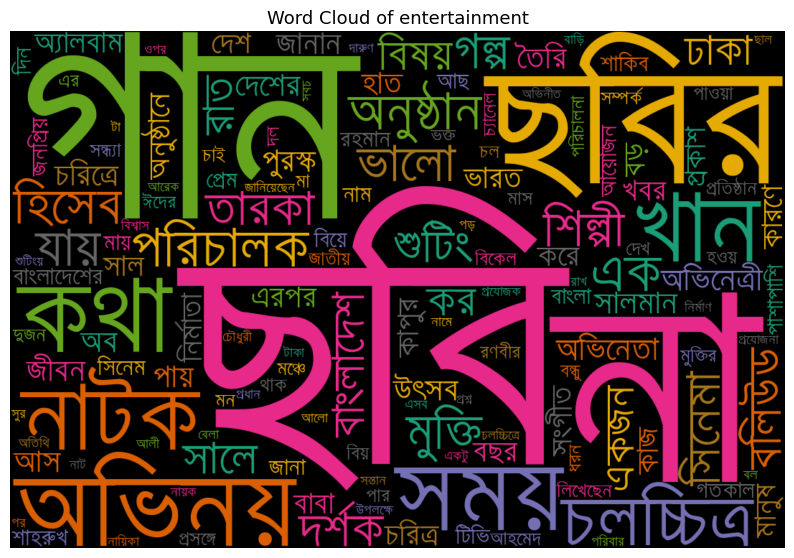

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


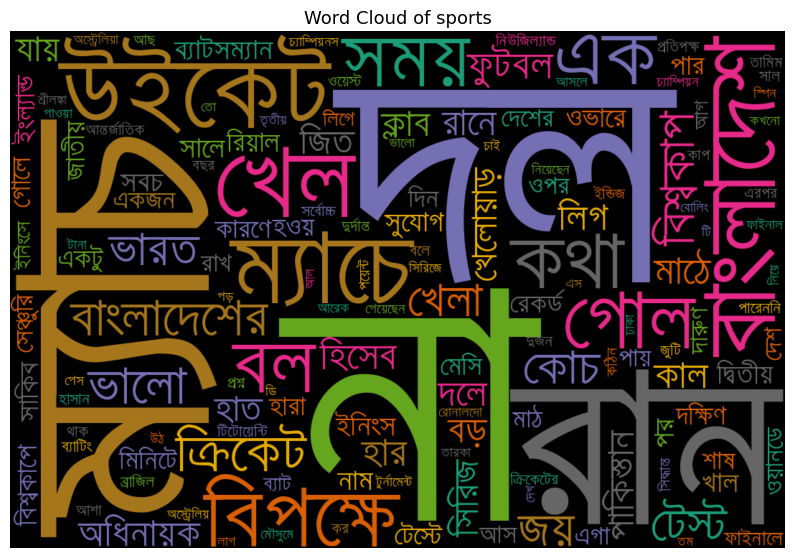

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


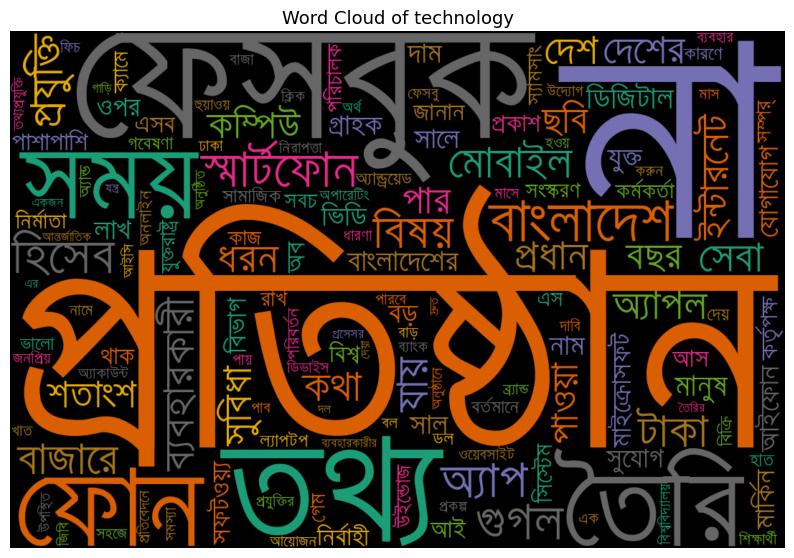

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


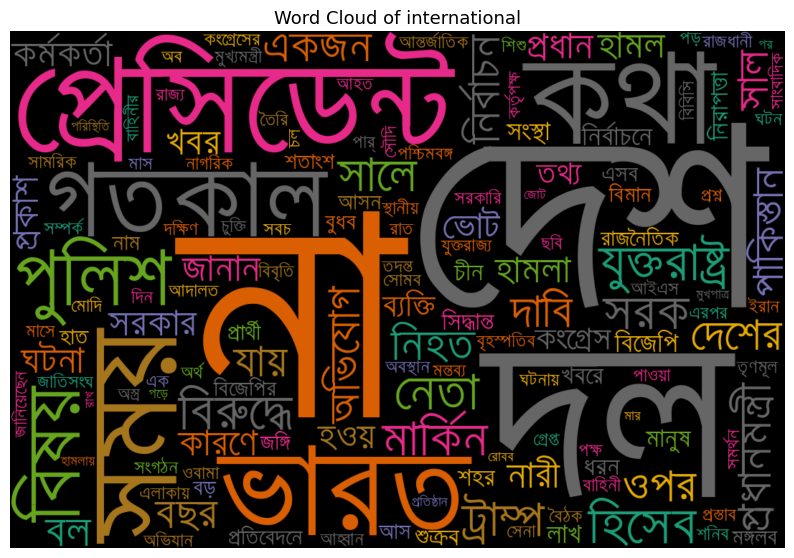

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


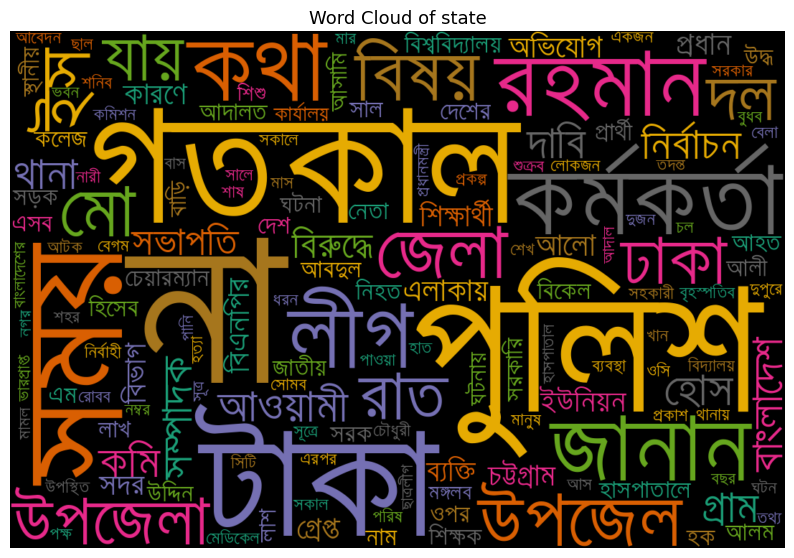

<ipython-input-81-4f30b10227e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())


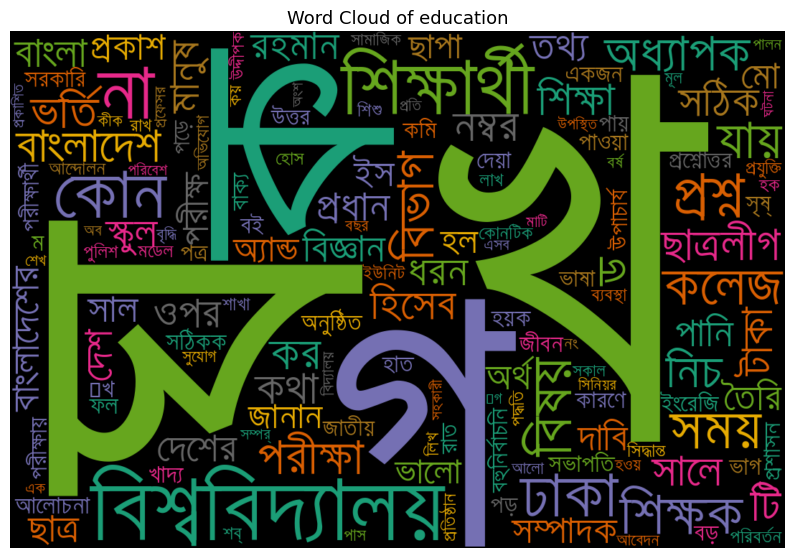

In [ ]:
for i in category_list:
    temp=cleaned_dataset.loc[cleaned_dataset['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))